# scikit-learn中的多项式回归

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [6]:
X2.shape

(100, 3)

In [7]:
X2[:5]

array([[ 1.        ,  1.11083977,  1.23396499],
       [ 1.        ,  0.49982565,  0.24982568],
       [ 1.        , -1.23091722,  1.5151572 ],
       [ 1.        ,  1.60743364,  2.58384291],
       [ 1.        , -2.63485381,  6.94245461]])

In [8]:
X[:5]

array([[ 1.11083977],
       [ 0.49982565],
       [-1.23091722],
       [ 1.60743364],
       [-2.63485381]])

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X2, y)
y_predict2 = lin_reg.predict(X2)

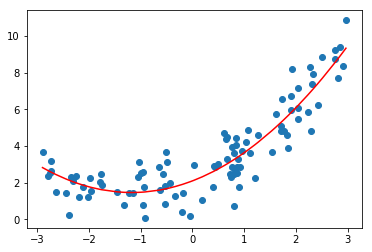

In [11]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [13]:
lin_reg.coef_

array([0.        , 1.07795068, 0.45912431])

In [14]:
lin_reg.intercept_

2.1005941727596706

## 关于PolynomialFeature

In [15]:
X = np.arange(1,11).reshape(-1,2)

In [16]:
X.shape

(5, 2)

In [17]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X3 = poly.transform(X)

In [18]:
X3.shape

(5, 6)

In [19]:
X3

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [20]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X4 = poly.transform(X)

In [21]:
X4.shape

(5, 10)

In [23]:
X4

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

## Pipeline

In [24]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 参数是列表 列表里面是元组
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [30]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

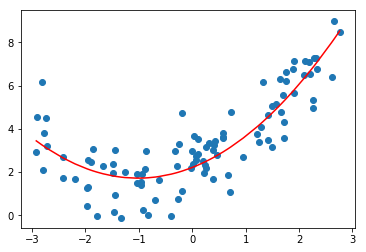

In [31]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()